In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import PIL
from tensorflow.keras.models import load_model
     
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

test_images_path = "/home/eonrrfe/Documents/Repos/Others/CarDetection/test_images/reduced_stanford_dataset/test_images"
path_to_model = "/home/eonrrfe/Documents/Repos/Others/CarDetection/test_images/reduced_stanford_dataset/resnet_50_model.keras"

In [4]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_images_path,
    seed=42,
    image_size=(180,180),
    batch_size=50,
)
class_names = test_ds.class_names

class_names

Found 1629 files belonging to 157 classes.


['acuraintegra',
 'acurarl',
 'acuratl',
 'acuratsx',
 'acurazdx',
 'amgeneral',
 'astonmartin',
 'audi100',
 'audia5',
 'audir8',
 'audirs',
 'audis4',
 'audis5',
 'audis6',
 'auditt',
 'auditts',
 'audiv8',
 'bentleyarnage',
 'bentleycontinental',
 'bentleymulsanne',
 'bmw1',
 'bmw3',
 'bmw6',
 'bmwactivehybrid',
 'bmwm3',
 'bmwm5',
 'bmwm6',
 'bmwx3',
 'bmwx5',
 'bmwx6',
 'bmwz4',
 'bugattiveyron',
 'buickenclave',
 'buickrainier',
 'buickregal',
 'buickverano',
 'cadillaccts-v',
 'cadillacescalade',
 'cadillacsrx',
 'chevroletavalanche',
 'chevroletcamaro',
 'chevroletcobalt',
 'chevroletcorvette',
 'chevroletexpress',
 'chevrolethhr',
 'chevroletimpala',
 'chevroletmalibu',
 'chevroletmonte',
 'chevroletsilverado',
 'chevroletsonic',
 'chevrolettahoe',
 'chevrolettrailblazer',
 'chevrolettraverse',
 'chrysler300',
 'chrysleraspen',
 'chryslercrossfire',
 'chryslerpt',
 'chryslersebring',
 'chryslertown',
 'daewoonubira',
 'dodgecaliber',
 'dodgecaravan',
 'dodgechallenger',
 'dodg

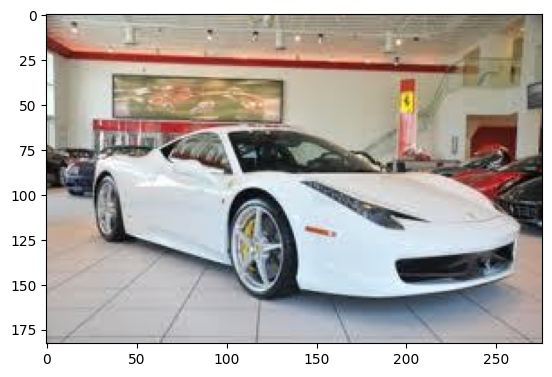

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediction: hyundaiaccent with a 0.69 percent confidence.


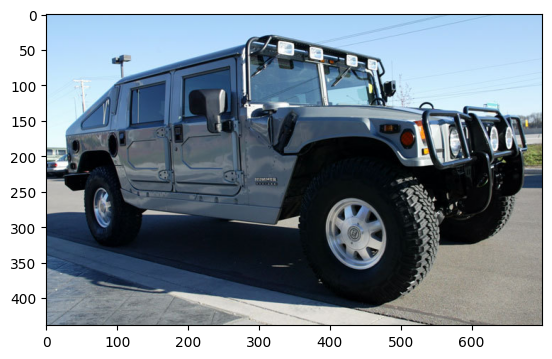

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction: chevroletsilverado with a 0.67 percent confidence.


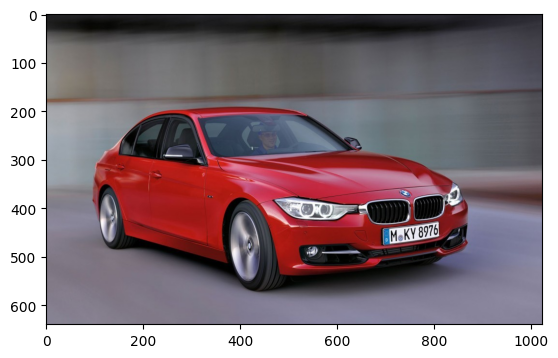

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: chrysler300 with a 0.67 percent confidence.


In [7]:
model = load_model(path_to_model)
image_size = (224, 224)
car_path = [
  f"{test_images_path}/ferrari458/00512.jpg",
  f"{test_images_path}/amgeneral/00707.jpg",
  f"{test_images_path}/bmw3/07669.jpg"
]

for car in car_path:
  image = load_img(car, target_size=image_size)
  image = img_to_array(image)
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  temp = plt.imread(car)
  plt.imshow(temp)
  plt.show()
  image = keras.applications.resnet50.preprocess_input(image)
  predictions = model.predict(image)
  score = tf.nn.softmax(predictions[0])
  print(
      "Prediction: {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score)))